# Exercise 2 - CNNs, ResNets and LR-Scheduling

 * Deep Learning for Computer Vision – Winter Term 2024/25

 * Lecture by: Constantin Pape

 * Tutors: Anwai Archit, Oleg Bakumenko, Luca Freckmann, Marei Freitag, Sarah Muth, Sushmita Nair

 * Due date: **Tuesday, Nov 19, before 10:00**

### Time required to solve this exercise sheet

**As you will train a large number of models on this exercise sheet, model training will require an increased amount of time. So we recommend to start working on this sheet early.**

### Topics



In this exercise sheet, you will:

- work again with CIFAR-10

- implement a 1-layer CNN

- compare MLP and CNN

- vary architecture to improve model performance

- implement a ResNet for CIFAR-10

- learn about learning rate scheduling



*We are looking forward to seeing your solutions! Have fun!*

## IMPORTANT SUBMISSION INSTRUCTIONS



- **You need to answer all questions in written form!**

- When you've completed the exercise, download the notebook and rename it to `<surname1>_<surname2>_<surname3>.ipynb`

- Only submit the Jupyter Notebook (.ipynb file). No other file is required.

    - Upload it on `Stud.IP` -> `Deep Learning for Computer Vision` -> `Files` -> `Submission of Homework 2` -> `Tutorial X` (where, X is the tutorial you are assigned to).

- Make only one submission of the exercise per group.

- The deadline is strict.

- You have to present the exercise in the tutorials. We have a high ratio of students to tutors, so please decide which team member presents which part beforehand



Implementation:

- Do not change the cells which are marked as `DO NOT CHANGE`, similarly write your solution into the cells marked with TODOs for the questions asked.

### Imports

In [1]:
import torch

import torch.nn as nn

import torch.nn.functional as F

import torch.optim as optim

from torch.optim.lr_scheduler import ReduceLROnPlateau, ExponentialLR, StepLR

import torchvision

from torchvision import datasets, transforms, models

import fastprogress

import numpy as np

import pandas as pd

import seaborn as sn

import matplotlib.pyplot as plt

import time

import os


## 1. Setup



You can use the functions to grab the data, split the sets, create the dataloaders and plot results, etc. given to you at exercise sheet 1.



It is good practice to store functions that are constantly needed again in a separate file such that instead of copy-pasting the cells into each exercise notebook, you can use the python file containing the functions and import it in the notebooks.



If you work with Kaggle (recommended) you have to mount the drive first and create a path to your python module or download the file from your drive.

#### **TODO**

Create a file named `setup.py` with all the necessary functions. Download this file to your Kaggle workspace and import it on this notebook.



Hint: Use the package `gdown` to download files from google drive.



```python

!conda install -y gdown

!gdown <file_id>

```



Here's how to find the `file_id`: 

If the file URL is https://drive.google.com/file/d/1066jDUxp8fXwdcNGj8h0CWJA0KNLpvKk/view?usp=share_link



where, `file_id` is 2732jDmxp7fXwddNGj8h0CWJA0WWLpvKk

In [2]:
!conda install -y gdown

Retrieving notices: ...working... done
Channels:
 - rapidsai
 - nvidia
 - nodefaults
 - conda-forge
 - defaults
 - pytorch
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - gdown


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-24.9.2               |  py310hff52083_0         895 KB  conda-forge
    filelock-3.16.1            |     pyhd8ed1ab_0          17 KB  conda-forge
    gdown-5.2.0                |     pyhd8ed1ab_0          21 KB  conda-forge
    openssl-3.4.0              |       hb9d3cd8_0         2.8 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.7 MB

The following NEW packages will be INSTALLED:

  filelock           conda-forge/noarch::filelock-3.16.1-pyhd8ed1ab_0 
  gdown              conda-forg

In [3]:
# TODO: Download setup.py from google drive in Kaggle
!gdown 1kOVqbPZC97dJHoWYEi1Xob80zpN90SrE


Downloading...
From (original): https://drive.google.com/uc?id=1kOVqbPZC97dJHoWYEi1Xob80zpN90SrE
From (redirected): https://drive.google.com/uc?id=1kOVqbPZC97dJHoWYEi1Xob80zpN90SrE&confirm=t&uuid=df6ce14d-88a8-4c3f-9730-06f48763a584
To: /kaggle/working/setup.py
100%|██████████████████████████████████████| 21.8k/21.8k [00:00<00:00, 47.8MB/s]


In [4]:
# TODO: Import setup.py
import setup

## 2. Load dataset, create dataloader, etc.



#### **TODO**

Call the functions of `setup.py` to instantiate the train-, test- and validation datasets along with their dataloaders.

In [5]:
# TODO: Define device
device = setup.get_device()
num_cpus = os.cpu_count()


cuda available: True ; cudnn available: True ; num devices: 1
Using device Tesla P100-PCIE-16GB


In [6]:
data_dir = 'data'

batch_size = 256

# TODO: Grab data, generate split and initialize data loaders

trainset, testset, dataset_mean, dataset_std = setup.grab_data(data_dir)
trainset, valset = setup.generate_train_val_data_split(trainset)
trainloader, valloader, testloader = setup.init_data_loaders(trainset, valset, testset, batch_size, num_cpus)

100%|██████████| 170498071/170498071 [00:03<00:00, 48631829.39it/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified
Files already downloaded and verified


#### **TODO** 

Define the loss function. We use the cross entropy loss again.

In [7]:
# TODO: Define loss function
loss_function = nn.CrossEntropyLoss()


## 3. Simple 1-layer CNN model

### **TODO**

- Define the model.



The first step to training a model is defining its architecture. 

Define a sequential model with following structure:

*   Convolutional layer with 32 filters, kernel size of 5*5 and stride of 1.

*   Max Pooling layer with kernel size of 2*2 and default stride.

*   ReLU Activation Layers.

*   Linear layer with output of 512.

*   ReLU Activation Layers.

*   A linear layer with output of 10.

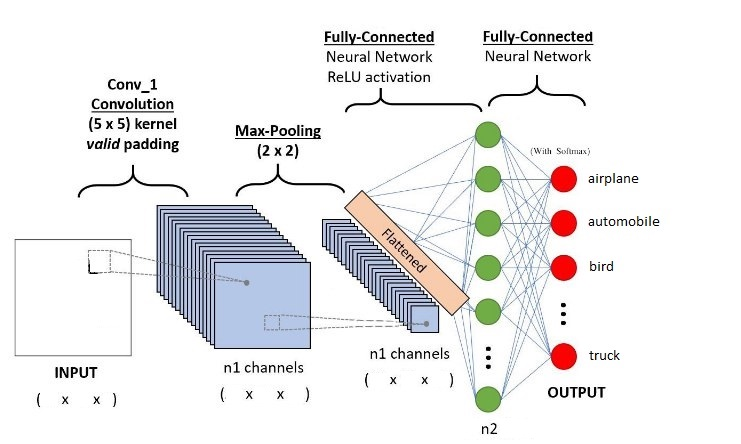

#### **Questions**



- What are the input dimensions?

- What are the dimensions of the feature maps?

- What are the dimensions after pooling?

- What is the size of each input (i.e value of `in_features`) to the first fully connected linear layer?

- What is the number of parameters for conv_1?

**Your answers here**

- Input of CIFAR-10: 32 x 32 x 3

- Convolution Layer: $\text{Output width} = \frac{\text{Input} - \text{Kernel}}{\text{Stride}}+1 = \frac{32-5}{1} + 1 = 28$ $\rightarrow$ 28 x 28 x 32

- Pooling Layer: $\frac{28 - 2}{2} + 1 = 14$ $\rightarrow$ 14 x 14 x 32

- Input to fully connected linear layer: $14 \cdot 14 \cdot 32 = 6272$

- Number of parameters for conv_1: $(\text{Kernel Height} \cdot \text{Kernel Width} \cdot \text{Input Channels} + 1) \cdot \text{Number of Filters} = (5 \cdot 5 \cdot 3 + 1) \cdot 32 = 2432$

In [8]:
# TODO: Define model

class CNN_1_Layer(nn.Module):
    """1 Layer CNN torch model."""
    def __init__(self, img_width, num_in_channels):
        """Initialize model.

        Args:
            img_width (int): Width of images
            num_in_channels (int): Number of input channels of images
        """
        
        super(CNN_1_Layer, self).__init__() # Initializes the base class

        # Convolutional layer:
        self.conv_1 = nn.Conv2d(in_channels=num_in_channels, out_channels=32, kernel_size=5, stride=1)

        # Max pooling layer:
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # ReLU Activation:
        self.relu = nn.ReLU()

        # First linear layer:
        self.ll1 = nn.Linear(img_width * 14 * 14, 512)

        # Second linear layer:
        self.ll2 = nn.Linear(512, 10)

        
    def forward(self, x):
        """Compute model predictions.

        Args:
            x (torch.Tensor, shape (batchsize, num_channels, x, y)): Tensor of
                batch of input images

        Returns:
            torch.Tensor, shape (batchsize, num_classes): Tensor of model
                predictions
        """

        x = self.relu(self.conv_1(x)) # Convolution + ReLU
        x = self.pool(x) # Max Pooling
        x = x.view(-1, 32 * 14 * 14) # Flattening
        x = self.relu(self.ll1(x)) # Fully Connected Layer + ReLU
        x = self.ll2(x) # Final Output Layer
        
        return x 


#### **TODO**



- Train the model for 10 epochs. Try lr=0.001 (can be changed to suit other design choices you make)

- Plot the results of accuracy and loss as you did in exercise sheet 1.

Finished training after 61 seconds.
Best training loss at epoch 9: 0.31645866697001607
Best validation loss at epoch 3: 0.9620585337281227
-------------------------------------------------------
Best training accuracy at epoch 10: 0.8966
Best validation accuracy at epoch 9: 0.6751
-------------------------------------------------------


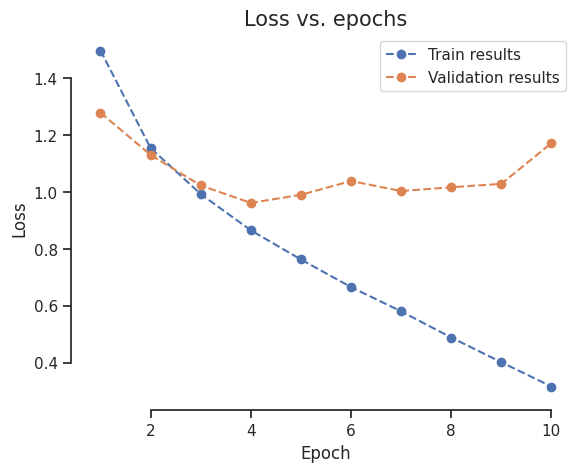

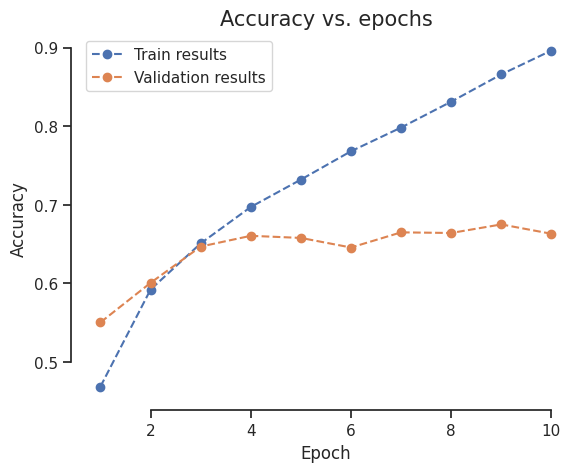

In [9]:
# TODO: Train and plot
lr = 0.001

num_epochs = 10

cnn_1_layer = CNN_1_Layer(32, 3)
cnn_1_layer = cnn_1_layer.to('cuda') # add model to cuda

adam_optimizer = optim.Adam(cnn_1_layer.parameters(), lr=lr)

train_losses, val_losses, train_accs, val_accs, confusion_matrix = setup.run_training(cnn_1_layer, adam_optimizer, loss_function, device, num_epochs, trainloader, valloader)

setup.best_loss(train_losses, val_losses)
setup.best_acc(train_accs, val_accs)

setup.plot(f"Loss vs. epochs", "Loss", train_losses, val_losses)
setup.plot(f"Accuracy vs. epochs", "Accuracy", train_accs, val_accs)

#### **TODO**

Compare results to the MLP models you trained in Exercise 1. What can you observe?

**Your answers here**

Accuracy is much larger and the loss smaller than with the MLP model.

The validation loss is increasing for larger epochs $\rightarrow$ maybe overfitting

**For your reference, below is the loss and accuracy plots of an MLP model trained in Exercise sheet 1:**

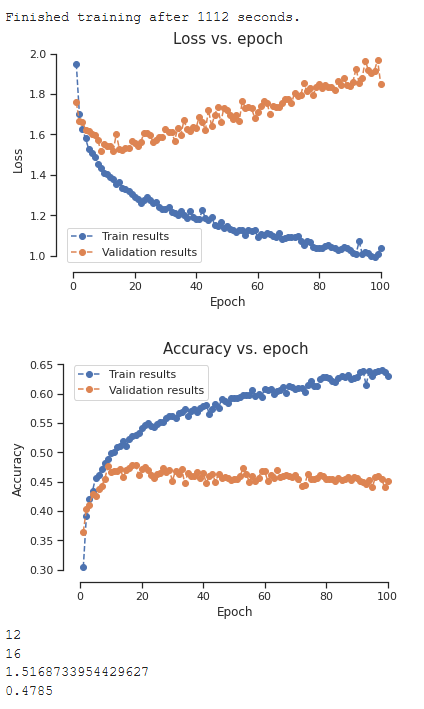

#### **TODO** 

Train longer (ca. 60 epochs), plot again.

Finished training after 362 seconds.
Best training loss at epoch 59: 5.380836383392886e-05
Best validation loss at epoch 5: 0.9935647428035737
-------------------------------------------------------
Best training accuracy at epoch 26: 1.0
Best validation accuracy at epoch 26: 0.68
-------------------------------------------------------


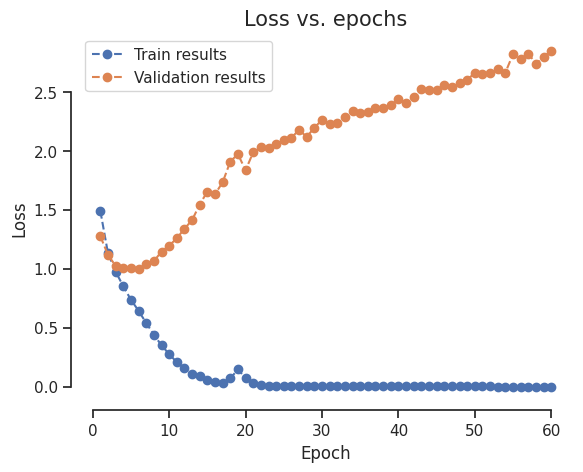

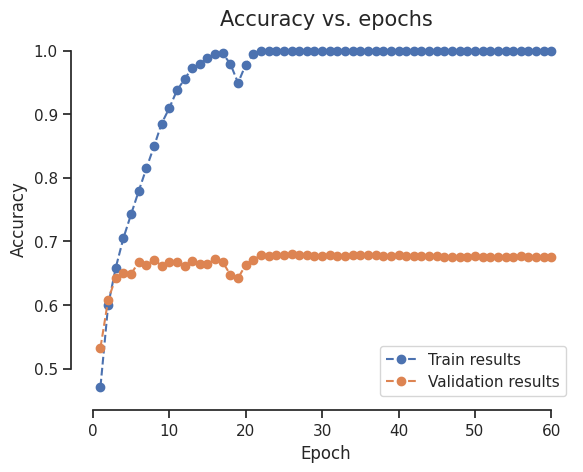

In [10]:
# TODO: Train and plot

num_epochs = 60

cnn_1_layer = CNN_1_Layer(32, 3)
cnn_1_layer = cnn_1_layer.to('cuda') # add model to cuda

adam_optimizer = optim.Adam(cnn_1_layer.parameters(), lr=lr)

train_losses, val_losses, train_accs, val_accs, confusion_matrix = setup.run_training(cnn_1_layer, adam_optimizer, loss_function, device, num_epochs, trainloader, valloader)

setup.best_loss(train_losses, val_losses)
setup.best_acc(train_accs, val_accs)

setup.plot(f"Loss vs. epochs", "Loss", train_losses, val_losses)
setup.plot(f"Accuracy vs. epochs", "Accuracy", train_accs, val_accs)

#### **Questions**

- Why is that not an optimal model?

- What could be improved?

**Your answers here**

Overfitting (Validation loss increasing for more epochs and 100% train accuracy)

Improvements:

- Amplification of data (more data) with transformations (e.g. zooming, cropping, flipping, color shifts)
- Regularization
- Early Stopping
- Deeper networks (Change Architecture)

## 4. CNN model with more convolutional layers

#### **TODO**

Define the architecture using the following information:







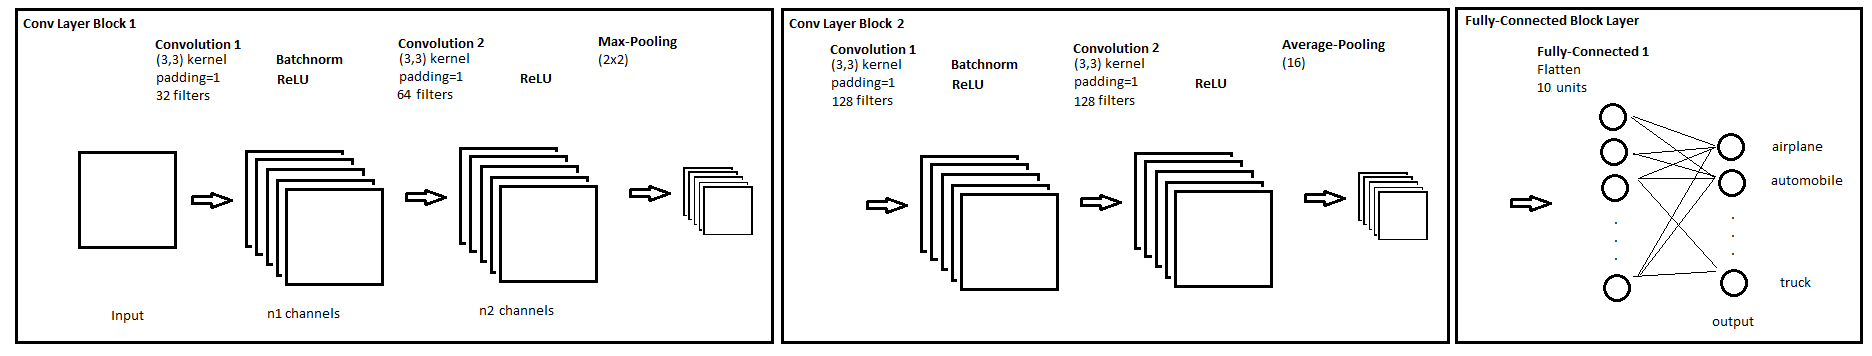

*   Convolutional layer 1: with 32 filters, kernel size of 3*3 and padding 1.

*   Batchnorm and ReLU layers

*   Convolutional layer 2: with 64 filters, kernel size of 3*3 and padding 1.

*   ReLU Activation layer

*   Max pooling with kernel size of 2*2

*   Convolutional layer 3: with 128 filters, kernel size of 3*3 and padding 1.

*   Batchnorm and ReLU layers

*   Convolutional layer 4: with 128 filters, kernel size of 3*3 and padding 1.

*   ReLU Activation layer

*   Average pooling with kernel size 16*16

*   Fully connected layer

#### **Questions**



- Padding is used in the convolutional layers. What does that mean, which variants exist and how does it influence the dimensions of the feature maps?

- What does padding=1 mean in the case of the network displayed above?

- What are the dimensions of the feature maps after the 1. conv layer?

- What are the dimensions of the feature maps after the 2. conv layer?

- What ist the receptive field size after the first two convolutions?

- What is the value for the in_features for the fully-connected layer?

- What is the number of parameters of *Conv Layer block 1*?

**Your answers here**

- Extra border of pixels of zeros at the edges of the image; $\text{Output width} = \frac{\text{Input} + 2\cdot\text{Padding} - \text{Kernel}}{\text{Stride}}+1$
  
- At every edge there is 1 row/column of extra pixels
  
- $\text{Output width} = \frac{32+2-3}{1} + 1 = 32$ $\rightarrow$ 32 x 32 x 32

- $32+2-3 + 1 = 32$ $\rightarrow$ 32 x 32 x 64

- Receptive Field: $\text{RF} = 1 + \sum\limits_{l=1}^L(k_l - 1) = 1 + 2 + 2 = 5$

- - Max pooling: $\frac{32 - 2}{2} + 1 = 16$ $\rightarrow$ 16 x16 x 64
  - Conv3: $\frac{16 - 3 + 2}{1} + 1 = 16$ $\rightarrow$ 16 x 16 x 128
  - Conv4: $\frac{16 - 3 + 2}{1} + 1 = 16$ $\rightarrow$ 16 x 16 x 128
  - Avg pooling: $\frac{16 - 16}{16} + 1 = 1$ $\rightarrow$ 1 x 1 x 128
  - in_features: $1\cdot 1\cdot 128 = 128$

- Parameters conv block 1: as above $(3 \cdot 3 \cdot 3 + 1)\cdot 32 = 896$; batch norm has 2 parameters per channel $\rightarrow$ $\text{parameters} = 896 + 2\cdot 32 = 960$

In [11]:
#TODO: Define model 2

class CNN_large(nn.Module):
    """Large CNN torch model."""
    def __init__(self, num_in_channels, num_classes):
        """Initialize model.

        Args:
            num_in_channels (int): Number of input channels of images
            num_classes (int): Number of classes to predict
        """
        
        super(CNN_large, self).__init__() # Initializes the base class

        # Convolutional layer 1:
        self.conv1 = nn.Sequential(nn.Conv2d(in_channels=num_in_channels, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32), nn.ReLU())
        
        # Convolutional layer 2:
        self.conv2 = nn.Sequential(nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1), nn.ReLU())
        
        # Max Pooling layer:
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Convolutional layer 3:
        self.conv3 = nn.Sequential(nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128), nn.ReLU())
        
        # Convolutional layer 4:
        self.conv4 = nn.Sequential(nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1), nn.ReLU())
        
        # Average Pooling layer:
        self.pool2 = nn.AvgPool2d(kernel_size=16)
        
        # Fully connected layer:
        self.fc = nn.Linear(128, num_classes)

    
    def forward(self, x):
        """Compute model predictions.

        Args:
            x (torch.Tensor, shape (batchsize, num_channels, x, y)): Tensor of
                batch of input images

        Returns:
            torch.Tensor, shape (batchsize, num_classes): Tensor of model
                predictions
        """

        x = self.conv1(x)
        x = self.conv2(x)
        x = self.pool1(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.pool2(x)
        x = x.view(x.size(0), -1) # Flattening
        x = self.fc(x)
        
        return x 


#### **TODO** 



- train the new net (30 epochs, try lr=0.1 or change as necessary), plot the results, and compare the results to the 1-layer CNN

- explain why you observe these results

Finished training after 219 seconds.
Best training loss at epoch 28: 0.7146138100867059
Best validation loss at epoch 22: 0.9261357143521309
-------------------------------------------------------
Best training accuracy at epoch 29: 0.747425
Best validation accuracy at epoch 27: 0.6734
-------------------------------------------------------


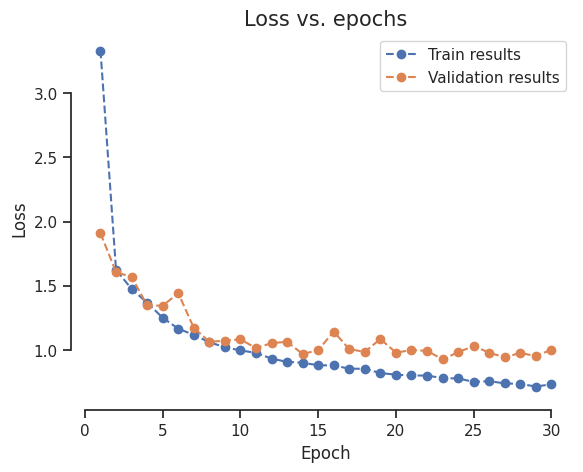

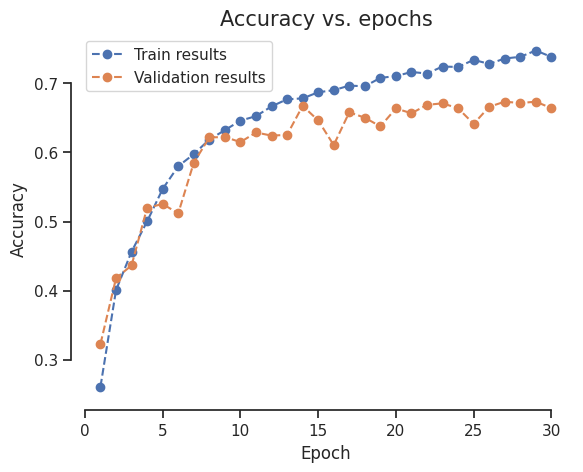

In [12]:
# TODO: Train and plot

num_epochs = 30
lr = 0.1

cnn_large = CNN_large(3, 10)
cnn_large = cnn_large.to('cuda') # add model to cuda

adam_optimizer = optim.Adam(cnn_large.parameters(), lr=lr)

train_losses, val_losses, train_accs, val_accs, confusion_matrix = setup.run_training(cnn_large, adam_optimizer, loss_function, device, num_epochs, trainloader, valloader)

setup.best_loss(train_losses, val_losses)
setup.best_acc(train_accs, val_accs)

setup.plot(f"Loss vs. epochs", "Loss", train_losses, val_losses)
setup.plot(f"Accuracy vs. epochs", "Accuracy", train_accs, val_accs)

## 5. ResNet architecture



"*Deeper neural networks are more difficult to train.  We present a residual learning framework to ease the training of networks that are substantially deeper than those used previously.*" [ https://arxiv.org/pdf/1512.03385.pdf]



That was the intention of He et al. to develop residual networks.



A ResNet is built of blocks which are called the *Residual Blocks*. 

A residual block uses *skip connections* - shortCuts — to jump over some layers to skip some activations.

The Resnet skips connections via addition.



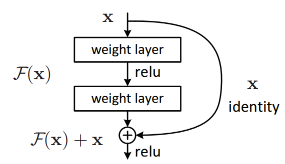

#### **Questions**

- Which problems do using skip connections solve?

- Why is a residual network called residual? 

**Your answers here**

- Fixes error of vanishing gradient

- Because it learns the residual (difference between output and input)

## **TODO**

- write a class **ResidualBlock(nn.Module)** where you define the blocks used in the ResNet

- write a class **ResNet(nn.Module)** where you define the model

- Train the model and plot results

- Train another model by disable residual connections and compare performance

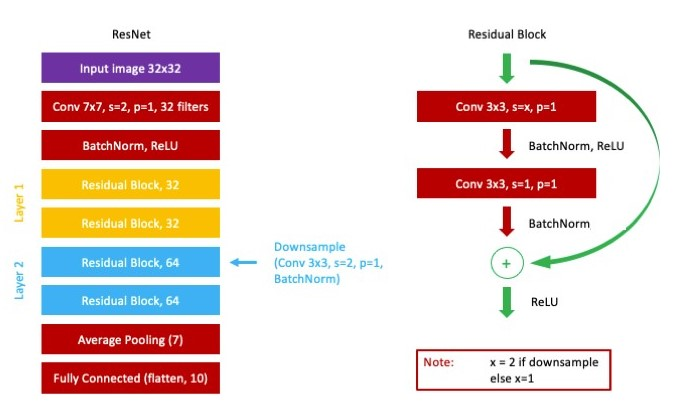

**Hints**



- The downsampling in this ResNet happens between layer 1 and layer 2. In this step, the channel size is increased (32 -> 64) and the image resolution is downsampled by strided convolution (stride=2 in the Conv2d layers).

- For the adding part, the dimensions obviously have to be the same. This is accomplished by using stride=2 in the first Conv2d layer of the block while the second layer does not change the dimensions.

- The average-pooling layer has kernel size 7.

- For you to ensure everything works fine, here are the shapes in the form [(batchsize), x, y, channel] where I discard batchsize, because it does not change.

32x32x3 -> conv 7x7 -> 14x14x32 -> layer 1 -> 14x14x32 -> layer2 -> 7x7x64 -> avpool(7) -> 1x1x64 -> linear(64, 10)

In [13]:
# TODO: Write a class ResidualBlock(nn.Module) where you define the blocks used in the ResNet

class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, use_residual=True):
        
        super(ResidualBlock, self).__init__()

        self.use_residual = use_residual
        
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)
        
        # Shortcut is an identity mapping if in_channels == out_channels and stride == 1
        if (stride == 1 and in_channels == out_channels):
            self.shortcut = nn.Identity()
        else: # To make shure the dimensions are correct
            self.shortcut = nn.Sequential(nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride),nn.BatchNorm2d(out_channels))
        
        
    def forward(self, x):
        identity = x
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        
        # Add the shortcut (either identity or transformed) to the output
        if self.use_residual:
            out += self.shortcut(identity)
            
        return F.relu(out)

In [14]:
# TODO: Write a class ResNet(nn.Module) where you define the model

class ResNet(nn.Module):
    def __init__(self, num_classes=10, use_residual=True):
        super(ResNet, self).__init__()
        
        self.use_residual = use_residual
        
        self.conv = nn.Conv2d(3, 32, kernel_size=7, stride=2, padding=1)
        self.bn = nn.BatchNorm2d(32)
        self.layer1 = self._make_layer(32, 32, 2, stride=1)
        self.layer2 = self._make_layer(32, 64, 2, stride=2)
        self.avg_pool = nn.AvgPool2d(kernel_size=7)
        self.fc = nn.Linear(64, num_classes)
    
    def _make_layer(self, in_channels, out_channels, blocks, stride): # To make the residual block layers
        layers = []
        layers.append(ResidualBlock(in_channels, out_channels, stride, use_residual=self.use_residual))
        for _ in range(1, blocks):
            layers.append(ResidualBlock(out_channels, out_channels, stride=1, use_residual=self.use_residual))
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn(self.conv(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.avg_pool(out)
        out = out.view(out.size(0), -1) # Flattening of input to fully connected layer
        return self.fc(out)

Finished training after 194 seconds.
Best training loss at epoch 29: 0.7416339869711809
Best validation loss at epoch 22: 1.0496731892228126
-------------------------------------------------------
Best training accuracy at epoch 30: 0.735925
Best validation accuracy at epoch 26: 0.6387
-------------------------------------------------------


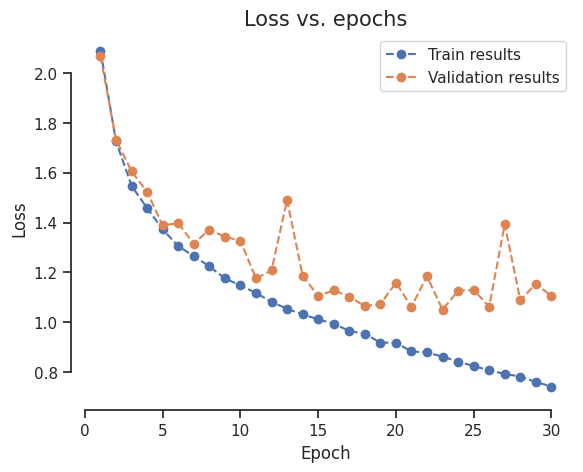

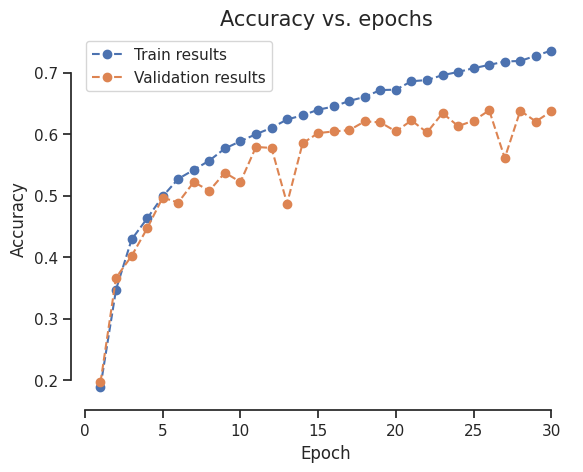

In [15]:
# TODO: Train ResNet using the architecture laid out in the comments and figures above. Plot loss and accuracy for training and validation set.

num_epochs = 30
lr = 0.1

model_with_residual = ResNet(use_residual=True)
model_with_residual = model_with_residual.to(device) # add model to device

adam_optimizer = optim.Adam(model_with_residual.parameters(), lr=lr)

train_losses, val_losses, train_accs, val_accs, confusion_matrix = setup.run_training(model_with_residual, adam_optimizer, loss_function, device, num_epochs, trainloader, valloader)

setup.best_loss(train_losses, val_losses)
setup.best_acc(train_accs, val_accs)

setup.plot(f"Loss vs. epochs", "Loss", train_losses, val_losses)
setup.plot(f"Accuracy vs. epochs", "Accuracy", train_accs, val_accs)

Finished training after 188 seconds.
Best training loss at epoch 29: 0.4952365680105367
Best validation loss at epoch 22: 0.9503230333328248
-------------------------------------------------------
Best training accuracy at epoch 29: 0.823925
Best validation accuracy at epoch 29: 0.6893
-------------------------------------------------------


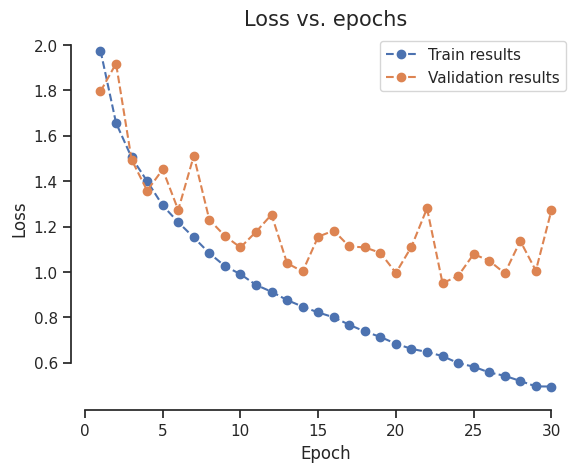

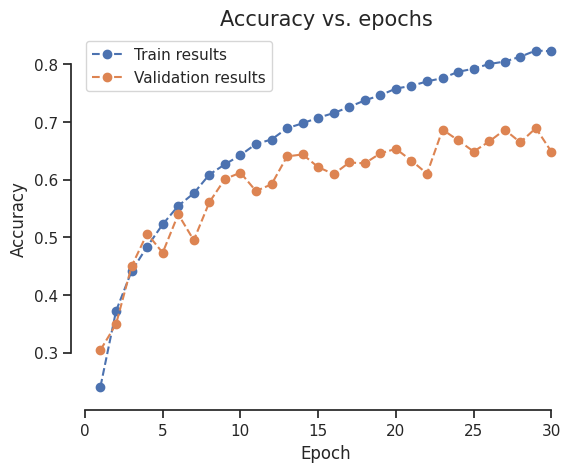

In [16]:
# TODO: Train another model by disabling all residual connections. Plot loss and accuracy curves for training and validation set.

model_without_residual = ResNet(use_residual=False)
model_without_residual = model_without_residual.to(device) # add model to device

adam_optimizer = optim.Adam(model_without_residual.parameters(), lr=lr)

train_losses, val_losses, train_accs, val_accs, confusion_matrix = setup.run_training(model_without_residual, adam_optimizer, loss_function, device, num_epochs, trainloader, valloader)

setup.best_loss(train_losses, val_losses)
setup.best_acc(train_accs, val_accs)

setup.plot(f"Loss vs. epochs", "Loss", train_losses, val_losses)
setup.plot(f"Accuracy vs. epochs", "Accuracy", train_accs, val_accs)

#### **Questions**

- Does using residual connections result in better performance in this exercise? If yes, why? If not, when would the benefit of using ResNet be most visible?

- In deeper networks, how would you expect residual blocks to influence training time? why?

- Compare the performance and training time of your ResNet with the CNNs you trained in the previous section.

**Your answers here**

- There is no difference. ResNet is good for deeper networks (this is still not very deep)

- The residual blocks can improve the training time in deep networks because they deal with the problem of vanishing gradients

- Both have similar val_accuracy (67% for CNN vs 68% for ResNet), but ResNet is a bit faster (226s for CNN vs 198s for ResNet)

## 6. Explore Learning Rate Scheduling



Learning rate scheduling is a mechanism to adjust the learning rate.



*`torch.optim.lr_scheduler`* provides several methods based on the number of epochs. Learning rate scheduling should be applied after optimizer’s update.

#### **TODO**

- change run_training and extend to use scheduler for learning rate

- use `StepLR` (https://pytorch.org/docs/stable/optim.html), use the ResNet, train for 10 epochs. Start with a learning rate of 0.1.



#### **Questions**



- Try step size 1, gamma 0.1

    - How does it change the learning rate?

    - what do you observe regarding performance?

- Try step size 1, gamma 0.9, what do you observe?

    - How does it change the learning rate?

    - what do you observe regarding performance?

- What can you conclude of this experiment regarding the synergy of step size and gamma to get a good schedule?

**Your answers here**

Smaller gamma leads to faster decreasing learning rate:

- - $\lambda = 10^{-11}$
  - Bad validation accuracy (~ 40%)

- - $\lambda \approx 0.03$
  - Good validation accuracy (~ 60%)
 
- Gamma should not be to small


In [30]:
# TODO: Change run_training (you can copy the code from setup.py here and create a new method here 

# or just change/create a new method it in the python file)

def run_training_lr_schedule(model, optimizer, step_size, gamma, loss_function, device, num_epochs, train_dataloader, val_dataloader, early_stopper=None, verbose=False):
    """Run model training.

    Args:
        model (nn.Module): Torch model to train
        optimizer: Torch optimizer object
        loss_fn: Torch loss function for training
        device (torch.device): Torch device to use for training
        num_epochs (int): Max. number of epochs to train
        train_dataloader (DataLoader): Torch DataLoader object to load the
            training data
        val_dataloader (DataLoader): Torch DataLoader object to load the
            validation data
        early_stopper (EarlyStopper, optional): If passed, model will be trained
            with early stopping. Defaults to None.
        verbose (bool, optional): Print information about model training. 
            Defaults to False.

    Returns:
        list, list, list, list, torch.Tensor shape (10,10): Return list of train
            losses, validation losses, train accuracies, validation accuracies
            per epoch and the confusion matrix evaluated in the last epoch.
    """
    start_time = time.time()
    master_bar = fastprogress.master_bar(range(num_epochs))
    train_losses, val_losses, train_accs, val_accs = [],[],[],[]
    
    path='checkpoint.pth'
    torch.save(model.state_dict(), path)

    scheduler = StepLR(optimizer, step_size, gamma)

    for epoch in master_bar:
        # Train the model
        epoch_train_loss, epoch_train_acc = setup.train(train_dataloader, optimizer, model, loss_function, device, master_bar)
        
        # Validate the model
        epoch_val_loss, epoch_val_acc, confusion_matrix = setup.validate(val_dataloader, model, loss_function, device, master_bar)

        # Save loss and acc for plotting
        train_losses.append(epoch_train_loss)
        val_losses.append(epoch_val_loss)
        train_accs.append(epoch_train_acc)
        val_accs.append(epoch_val_acc)

        scheduler.step()

        
        
        if verbose:
            master_bar.write(f'Train loss: {epoch_train_loss:.2f}, val loss: {epoch_val_loss:.2f}, train acc: {epoch_train_acc:.3f}, val acc {epoch_val_acc:.3f}')
            
        if early_stopper:
            early_stopper.update(epoch_val_acc, model)
            
            if early_stopper.early_stop:
                print("Early stopping triggered.")
                best_model = early_stopper.load_checkpoint(model) # Load best model
                break
                
        else:
            torch.save(model.state_dict(), path)

            #raise NotImplementedError # Comment out this keyword after your implementation

            # END OF YOUR CODE #
    
    print("Final learning rate of scheduling: ", scheduler.get_last_lr())
    
    time_elapsed = np.round(time.time() - start_time, 0).astype(int)
    print(f'Finished training after {time_elapsed} seconds.')
    return train_losses, val_losses, train_accs, val_accs, confusion_matrix



Final learning rate of scheduling:  [1.0000000000000006e-11]
Finished training after 63 seconds.
Best training loss at epoch 9: 1.5177730891355283
Best validation loss at epoch 8: 1.5159615129232407
-------------------------------------------------------
Best training accuracy at epoch 9: 0.4348
Best validation accuracy at epoch 6: 0.4343
-------------------------------------------------------


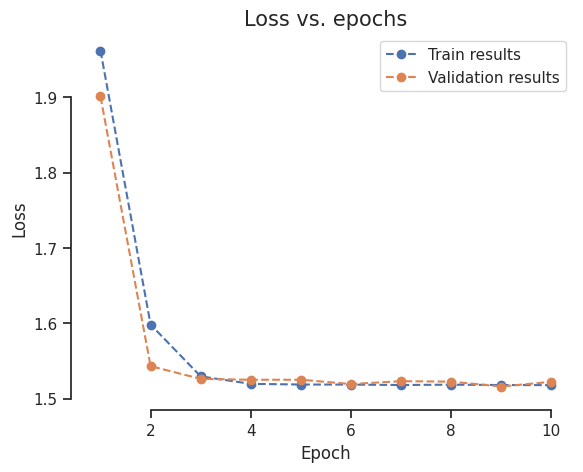

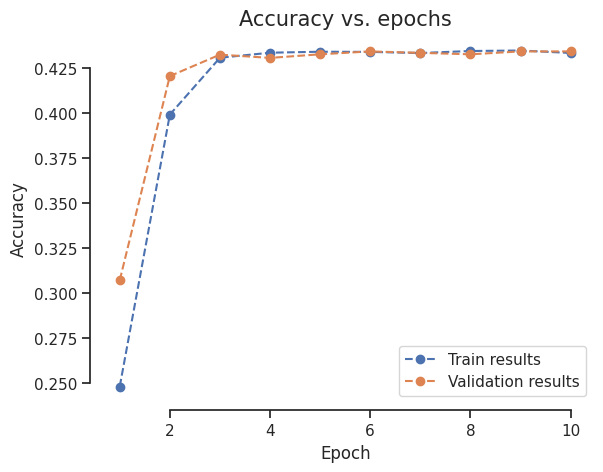

In [32]:
# TODO: Train and plot with step size 1, gamma 0.1
num_epochs = 10
lr_start = 0.1


step_size = 1
gamma = 0.1

resnet = ResNet(use_residual=True)
resnet = resnet.to(device) # add model to device

adam_optimizer = optim.Adam(resnet.parameters(), lr=lr_start)

train_losses, val_losses, train_accs, val_accs, confusion_matrix = run_training_lr_schedule(resnet, adam_optimizer, step_size, gamma, loss_function, device, num_epochs, trainloader, valloader)

setup.best_loss(train_losses, val_losses)
setup.best_acc(train_accs, val_accs)

setup.plot(f"Loss vs. epochs", "Loss", train_losses, val_losses)
setup.plot(f"Accuracy vs. epochs", "Accuracy", train_accs, val_accs)

Final learning rate of scheduling:  [0.03486784401000002]
Finished training after 63 seconds.
Best training loss at epoch 9: 0.889799282808972
Best validation loss at epoch 8: 1.0409140512347221
-------------------------------------------------------
Best training accuracy at epoch 10: 0.683975
Best validation accuracy at epoch 9: 0.6354
-------------------------------------------------------


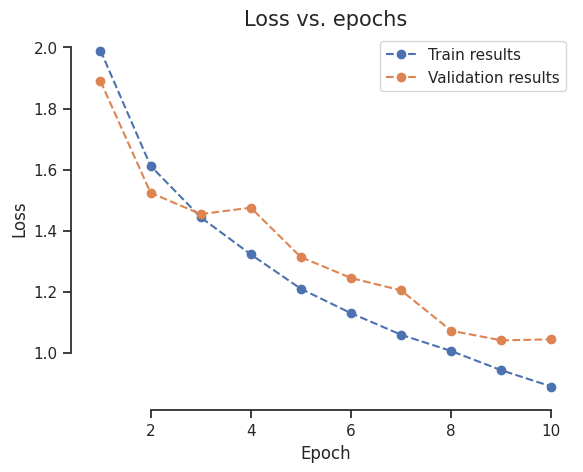

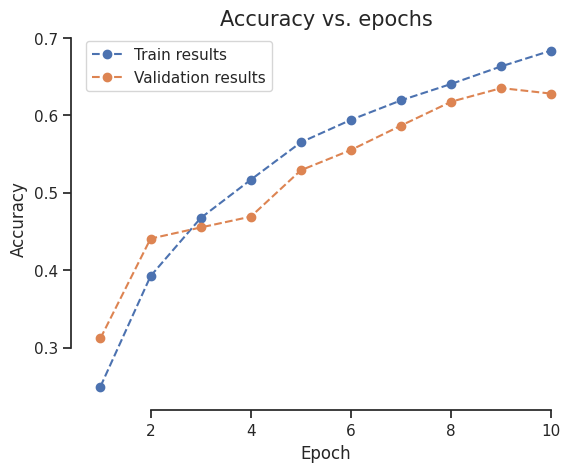

In [33]:
# TODO: Train and plot with step size 1, gamma 0.9

step_size = 1
gamma = 0.9

resnet = ResNet(use_residual=True)
resnet = resnet.to(device) # add model to device

adam_optimizer = optim.Adam(resnet.parameters(), lr=lr_start)

train_losses, val_losses, train_accs, val_accs, confusion_matrix = run_training_lr_schedule(resnet, adam_optimizer, step_size, gamma, loss_function, device, num_epochs, trainloader, valloader)

setup.best_loss(train_losses, val_losses)
setup.best_acc(train_accs, val_accs)

setup.plot(f"Loss vs. epochs", "Loss", train_losses, val_losses)
setup.plot(f"Accuracy vs. epochs", "Accuracy", train_accs, val_accs)

#### **TODO** 



Use step size 15, gamma 0.1. Train for 30 epochs.

Final learning rate of scheduling:  [0.0010000000000000002]
Finished training after 189 seconds.
Best training loss at epoch 29: 0.4825224606854141
Best validation loss at epoch 15: 0.8300586968660355
-------------------------------------------------------
Best training accuracy at epoch 30: 0.8326
Best validation accuracy at epoch 18: 0.7075
-------------------------------------------------------


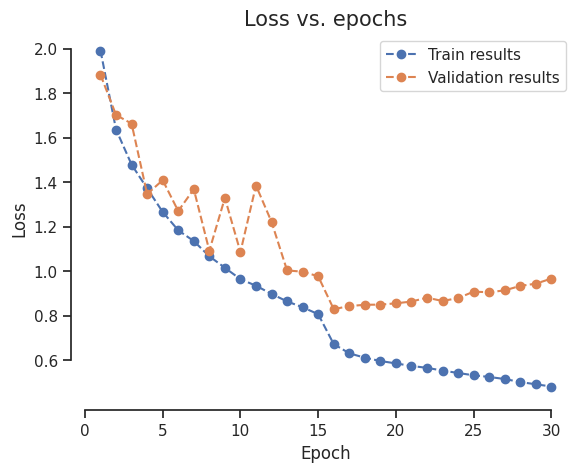

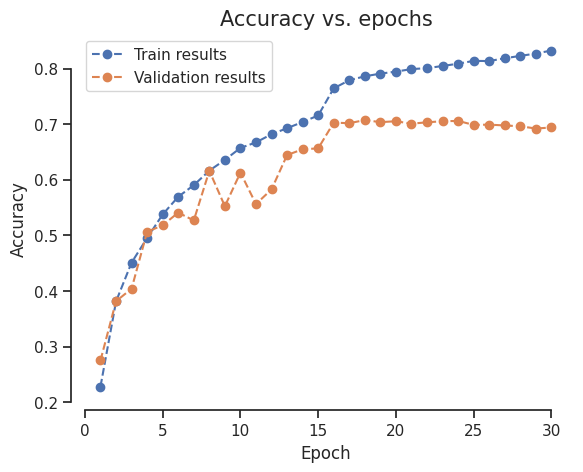

In [34]:
# TODO: Train and plot with step size 15, gamma 0.1, 30 epochs.

step_size = 15
gamma = 0.1
num_epochs = 30

resnet = ResNet(use_residual=True)
resnet = resnet.to(device) # add model to device

adam_optimizer = optim.Adam(resnet.parameters(), lr=lr_start)

train_losses, val_losses, train_accs, val_accs, confusion_matrix = run_training_lr_schedule(resnet, adam_optimizer, step_size, gamma, loss_function, device, num_epochs, trainloader, valloader)

setup.best_loss(train_losses, val_losses)
setup.best_acc(train_accs, val_accs)

setup.plot(f"Loss vs. epochs", "Loss", train_losses, val_losses)
setup.plot(f"Accuracy vs. epochs", "Accuracy", train_accs, val_accs)

#### **Questions**

- Does it improve performance?

- What can you observe in the plots?

**Your answers here**

- With the larger step size, the learning rate decreases slower

- Here we see that at the learning rate decay (epoch 15), the accuracy improves significantly. But after this epoch the loss of testing and validation diverge (Overfitting?)

## 7. LR-Scheduling _(Optional)_

#### TODO _(Optional)_

- try two more scheduler: ExponentialLR and ReduceLROnPlateau 

- vary the parameters, which work best?

- does it improve performance compared to no scheduler?

- does it improve performance compared to StepLR?

In [21]:
# TODO (Optional): Train and plot with different schedulers

**Your answers here**